### Assignment: Decision Tree Classification

#### Dataset: Heart Disease Prediction

In [102]:
import numpy as np
import pandas as pd

In [103]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Dataset Description

In [104]:
data.shape

(1025, 14)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The dataset contains 1025 patient records and 14 features, including numerical variables.
The target variable indicates whether a patient has heart disease or not.

In [106]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [107]:
data.duplicated().sum()

np.int64(723)

In [108]:
data.drop_duplicates(inplace=True)

In [109]:
data.duplicated().sum()

np.int64(0)

In [110]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [111]:
data.shape

(302, 14)

In [112]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [113]:
data[data['chol']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [114]:
data[data['age']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [115]:
data['cp'].unique()

array([0, 1, 2, 3])

In [116]:
data[data['trestbps']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [117]:
data['fbs'].unique()

array([0, 1])

In [118]:
data['restecg'].unique()

array([1, 0, 2])

In [119]:
data['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

In [120]:
data[data['thalach']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [121]:
data['exang'].unique()

array([0, 1])

In [122]:
data['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [123]:
data['slope'].unique()

array([2, 0, 1])

In [124]:
data['ca'].unique()

array([2, 0, 1, 3, 4])

In [125]:
data['thal'].unique()

array([3, 2, 1, 0])

### Part A: Conceptual Questions

##### 1. What is a Decision Tree and how does it make decisions?

Decision Tree is a Supervised learning, Non Parametric method and A Rule based learning Useful for both Classification and regression.

A decision tree is an inverted tree-like structure that mimics human decision-making by asking a series of questions. It works by recursively splitting data into subsets until a final decision or prediction is reached at the leaf nodes.

##### 2.What does a split criterion mean in a Decision Tree?

A split criterion in a Decision Tree is the rule or metric used to decide how to split data at each node of the tree.
Split Criteria for Classification Trees:
- Gini Impurity
- Entropy
- Information Gain
Split Criteria for Regression Trees:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
  
It uses not only the important feature at the top of the tree, but also the best split point for the feature, allowing the depth to be made smaller.
It is suitable for ensemble techniques that use many small trees.
However, the CART algorithm may not be suitable for categorical features. In particular, it is not very good for nominal categorical data.
In order to use CART, categorical data must be converted to numeric type in advance.

##### 3.Difference between Gini Impurity and Entropy.

Gini Impurity:

Measures the probability of incorrectly classifying a randomly chosen element, given the class distribution.
Gini Impurity or Gini Index measures the probability of a random instance being misclassified when chosen randomly. The lower the Gini Index, the lower the likelihood of misclassification.

Entropy:

Measures the uncertainty or disorder in the data.
A node with all samples from one class has entropy = 0.
A measure of the amount of randomness (lack of information/predictability)
Entropy is a criterion that measures the quality of the split. It is a measure of disorder or impurity in a node.
Purity is the degree to which the datapoints in a subset are from a single class

##### 4. Why do Decision Trees tend to overfit?

Decision Trees overfit because they grow too deep, creating very specific rules that memorize the training data.

##### 5. What role does the max_depth parameter play?

The max_depth parameter controls the maximum number of levels (depth) a Decision Tree is allowed to grow.
It limits how complex the tree can become.

Without max_depth, a Decision Tree will:

- Keep splitting until every leaf is pure
- Learn noise and outliers
- Overfit the training data

max_depth acts as a brake on this behavior.

### Part B: Data Exploration

In [126]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [127]:
data.shape

(302, 14)

In [128]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [129]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [130]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Part C: Data Preprocessing

In [131]:
X=data.drop('target',axis=1)
y=data['target']

In [132]:
from sklearn.model_selection import train_test_split


In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((241, 13), (61, 13), (241,), (61,))

### Part D: Model Building

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dt=DecisionTreeClassifier(criterion='gini',random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [136]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [137]:
dt.score(X_train,y_train)

1.0

In [138]:
y_pred=dt.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

###  Part E: Model Evaluation

In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [140]:
accuracy_score(y_pred,y_test)

0.8032786885245902

In [141]:
confusion_matrix(y_pred,y_test)

array([[22,  6],
       [ 6, 27]])

In [142]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



#### Which class is predicted better?

class 1 of precision,recall,f1-score,support all the values are greater than class 0
hence, class 1 predicted better

#### Is the model overfitting or underfitting?

The Model tends to overfitting

### Part F: Understanding Tree Depth (Manual Experiment)

In [143]:
dt1=DecisionTreeClassifier(max_depth=None)
dt1.fit(X_train,y_train)
print(f'Training score : {dt1.score(X_train,y_train)}')
y_pred=dt.predict(X_test)
print(f'Testing score : {accuracy_score(y_pred,y_test)}')

Training score : 1.0
Testing score : 0.8032786885245902


In [144]:
dt2=DecisionTreeClassifier(max_depth=2)
dt2.fit(X_train,y_train)
print(f'Training score : {dt2.score(X_train,y_train)}')
y_pred=dt.predict(X_test)
print(f'Testing score : {accuracy_score(y_pred,y_test)}')

Training score : 0.7842323651452282
Testing score : 0.8032786885245902


In [145]:
dt3=DecisionTreeClassifier(max_depth=5)
dt3.fit(X_train,y_train)
print(f'Training score : {dt3.score(X_train,y_train)}')
y_pred=dt.predict(X_test)
print(f'Testing score : {accuracy_score(y_pred,y_test)}')

Training score : 0.941908713692946
Testing score : 0.8032786885245902


#### 1. What happens when the tree is very shallow?

when the max_depth is 2
tree has very few splits
training score=78%
testing score=65%
shallow tree underfits the data because it is too simple.

#### 2. What happens when the tree is very deep?

when the max_depth is none
Tree grows until pure leaf nodes
Training score : 1.0
memorizes training data
Testing score : 0.7704918032786885
low test score

#### 3. Which model performs best and why?

The model with max_depth = 5 performs best because it balances bias and variance
Captures patterns without memorizing
the scores of test and train have small gap

### Part G: Tree Visualization

In [146]:
from sklearn.tree import plot_tree

In [147]:
import matplotlib.pyplot as plt

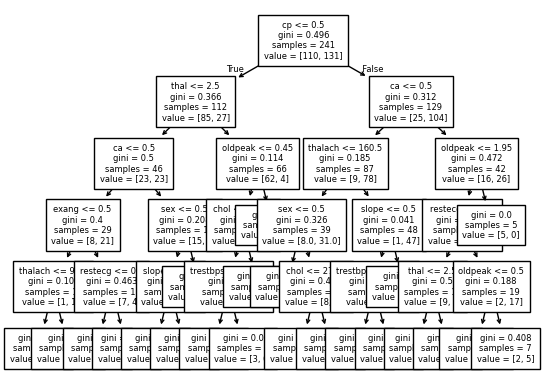

In [148]:
plot_tree(dt3,feature_names=X.columns,fontsize=6)
plt.show()

### Part H: Reflection Questions

##### 1. Why are Decision Trees suitable for medical datasets?

Decision Trees are especially suitable for medical datasets because they are interpretable, rule-based, and closely resemble clinical decision-making, which is critical in healthcare.

##### 2. What makes Decision Trees easy to interpret?

decison tree follow sequence of splitting based on ranges like if else type binary answers
so easy to interpet 

##### 3. Why are Decision Trees commonly used in ensemble methods?

Decision Trees are commonly used in ensemble methods because they are simple, flexible, and high-variance learners, which makes them ideal building blocks when combined to create powerful, stable models.

### Finally Check with these below parameter

##### Compare criterion='gini' vs criterion='entropy'

In [149]:
dt5=DecisionTreeClassifier(criterion='gini',max_depth=5)
dt5.fit(X_train,y_train)
print(f'Training score : {dt5.score(X_train,y_train)}')
y_pred=dt.predict(X_test)
print(f'Testing score : {accuracy_score(y_pred,y_test)}')

Training score : 0.941908713692946
Testing score : 0.8032786885245902


In [150]:
dt6=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt6.fit(X_train,y_train)
print(f'Training score : {dt6.score(X_train,y_train)}')
y_pred=dt.predict(X_test)
print(f'Testing score : {accuracy_score(y_pred,y_test)}')

Training score : 0.9253112033195021
Testing score : 0.8032786885245902


The testing accuracy_score is same for both gini and entropy but Gini fits training data slightly more
Entropy is slightly less

#### Try min_samples_leaf manually

In [151]:
dt7=DecisionTreeClassifier(min_samples_leaf=5)
dt7.fit(X_train,y_train)
print(f'Training score : {dt7.score(X_train,y_train)}')
y_pred=dt.predict(X_test)
print(f'Testing score : {accuracy_score(y_pred,y_test)}')

Training score : 0.9087136929460581
Testing score : 0.8032786885245902


Earlier the training got overfitted now when we given min_sample_leaf=5 it minimizes the samples so the training accuracy drops